# Titanic: Machine Learning from Disaster

# OVERVIEW :

# General Information on the Data:


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


# Goal:

It is your job to predict if a passenger survived the sinking of the Titanic or not.
you must predict a 0 or 1 value for the variable.

# Source Downloaded Dataset from https://www.kaggle.com/c/titanic/data

# Attributes Description :

Survival - Survival (0 = No; 1 = Yes)

PassengerId-Passengers ID

Class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



# LIFE CYCLED FOLLOWED :

1) DATA ACQUISITION

2) EXPLATORY DATA ANALYSIS I.e EDA

3) DATA VISUALIZATION

4) DATA PREPROCESSING

5) FEAUTURE ENGINEERING

6) FEATURE SCALING

7) MODEL BUILDING

8) OPTIMIZATION

9) CONCLUSION

# Importing Necessary Libraries


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from time import time
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

# STEP-1 DATA ACQUISITION

In [2]:
#lets import data from csv file
titanic=pd.read_csv('datasets_11657_16098_train (1).csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we have total 11 features as an input(PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked) 

and 1 feature as output(Survived) so let's see all data one by one

# STEP-2 EDA

In [3]:
#Dropping the duplicates
titanic = titanic.drop_duplicates()

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Shape of the data that we are deaing with

print("NO. Of. Rows = %s" % titanic.shape[0])
print("NO. Of. Columns = %s" % titanic.shape[1])

NO. Of. Rows = 891
NO. Of. Columns = 12


In [6]:
#Using pandas options to set float_format to 2 decimals after the point.
pd.options.display.float_format = '{:.2f}'.format   #This makes the table clear and easy to understand

In [7]:
#Numerical and Categorical features
numerical_feats = titanic.dtypes[titanic.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = titanic.dtypes[titanic.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


Skewness: 0.478523
Kurtosis: -1.775005


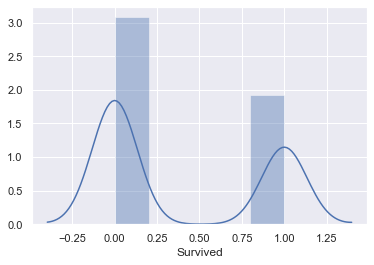

In [8]:
#Skewness and Kurtosis of the target variable
# Skew and kurt
sns.distplot(titanic['Survived']);
print("Skewness: %f" % titanic['Survived'].skew())
print("Kurtosis: %f" % titanic['Survived'].kurt())

Skewness:
    
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric 
if it looks the same to the left and right of the center point.
The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.
Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data 
that are skewed right.

Kurtosis:
    
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
Data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails,
or lack of outliers.

In [9]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(titanic[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(titanic[col].kurt())  
         )

PassengerId     Skewness: 00.00     Kurtosis: -01.20
Survived        Skewness: 00.48     Kurtosis: -01.78
Pclass          Skewness: -0.63     Kurtosis: -01.28
Age             Skewness: 00.39     Kurtosis: 000.18
SibSp           Skewness: 03.70     Kurtosis: 017.88
Parch           Skewness: 02.75     Kurtosis: 009.78
Fare            Skewness: 04.79     Kurtosis: 033.40


In [10]:
#SUMMARY OF ONLY CATEGORICAL TYPE
titanic.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Elsbury, Mr. William James",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [11]:
#SUMMARY OF ONLY Numerical TYPE
titanic.describe(include=['int','float64']).T

,count,mean,std,min,25%,50%,75%,max
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [12]:
#Checking for the unique values present in the numerical features.
for i in titanic.columns:
    if(titanic[i].dtype!=type(object)):
        print(i,':\n',titanic[i].unique(),'\n')

PassengerId :
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243

In [13]:
# Printing no of outliers in Numerical column
for i in titanic.columns:
    if(titanic[i].dtype!=type(object)):
        q1=titanic[i].quantile(0.25)
        q3=titanic[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        out_ub=titanic[titanic[i]>ub][i]
        out_lb=titanic[titanic[i]<lb][i]
        print("no of outliers in",i,"is",len(out_ub)+len(out_lb))

no of outliers in PassengerId is 0
no of outliers in Survived is 0
no of outliers in Pclass is 0
no of outliers in Age is 11
no of outliers in SibSp is 46
no of outliers in Parch is 213
no of outliers in Fare is 116


{'whiskers': [<matplotlib.lines.Line2D at 0x26c2b6fd408>,
 'caps': [<matplotlib.lines.Line2D at 0x26c2b6fdd88>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26c2b6f7d48>],
 'medians': [<matplotlib.lines.Line2D at 0x26c2b702d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c2b707b88>],
 'means': []}

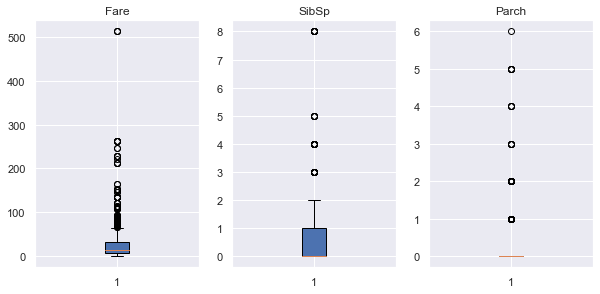

In [14]:
#ploting boxplot for all columns to check wheather the outliers are present in dataset or not. 
plt.figure(figsize=(10,10))


plt.subplot(2,3,1)
plt.title('Fare')
plt.boxplot(titanic['Fare'],patch_artist=True)


plt.subplot(2,3,2)
plt.title('SibSp')
plt.boxplot(titanic['SibSp'],patch_artist=True)

plt.subplot(2,3,3)
plt.title('Parch')
plt.boxplot(titanic['Parch'],patch_artist=True)


# STEP 3 & 4  DATA PRE PROCESSING AND VISUALIZATION

# PassengerID

In [15]:
#Passengerid is a unique identity of passengers so this does not matter to Survival of a Passenger So, 
#let's drop Passengerid feature
titanic=titanic.drop(['PassengerId'],1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Pclass

In [16]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

 Pclass id for define Ticket class. Like Economical class,business class

1) class 3 for higher class

2) class 2 for midddel class

3) class 1 for lowwer class So, let's visualize this data

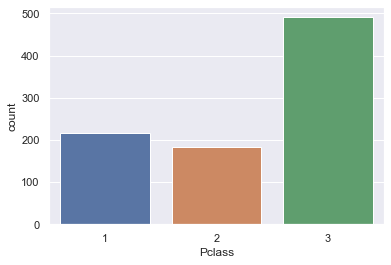

In [17]:
sns.countplot(x=titanic['Pclass'])

In [18]:
#Here we can see that highest number of passengers travelling in class 3,Lets see relation between Pclass and Survival

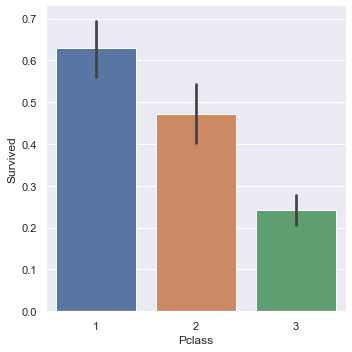

In [19]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='bar')

In [20]:
#As per Barplot, we can say that class 1 passengers mostly likely to survive

# Name

In [21]:
#lets see top 5 row data
titanic['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
#As we can see to the dat its look like this does not matter for our model, 
#but it matters lot let's extract some data from it

In [23]:
#let's extract Titles of Passengers
titanic['Title']=titanic['Name'].str.extract('([A-Za-z]+)\.',)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [24]:
#this all are unique titles we got from names

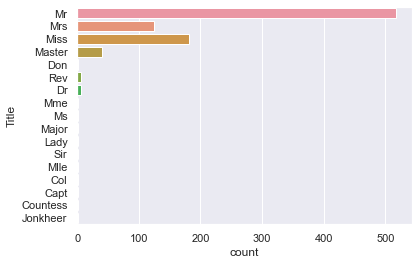

In [25]:
sns.countplot(y=titanic['Title'])

In [26]:
#above count plot showing number of title we have in our data

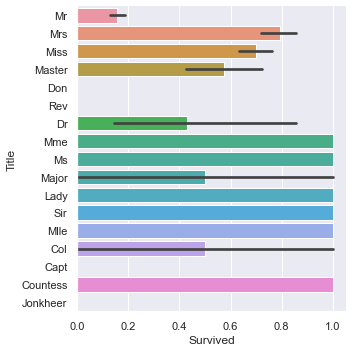

In [27]:
sns.catplot(y='Title',x='Survived',data=titanic,kind='bar')

In [28]:
#now we can see some meaningfull of title feature

In [29]:
#we do not need Name longer so,Let's drop it
titanic=titanic.drop(['Name'],1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.00,1,0,A/5 21171,7.25,NaN,S,Mr
1,1,1,female,38.00,1,0,PC 17599,71.28,C85,C,Mrs
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Miss
3,1,1,female,35.00,1,0,113803,53.10,C123,S,Mrs
4,0,3,male,35.00,0,0,373450,8.05,NaN,S,Mr


# Sex

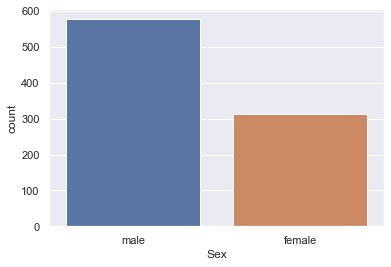

In [30]:
sns.countplot(titanic['Sex'])

In [31]:
#Male is more than female in the Titanic

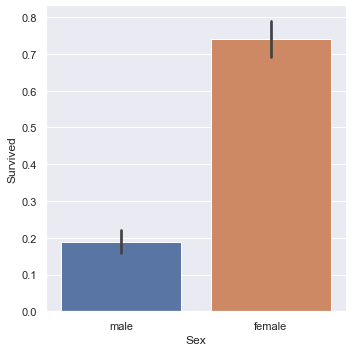

In [32]:
sns.catplot(x='Sex',y='Survived',data=titanic,kind='bar')

In [33]:
#female is more likely to survive

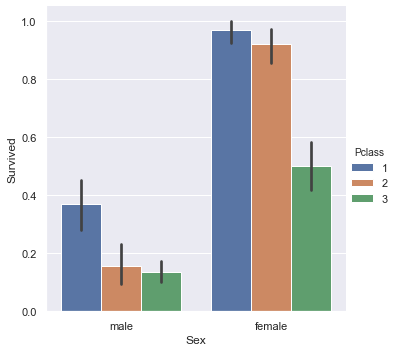

In [34]:
sns.catplot(x='Sex',y='Survived',data=titanic,kind='bar',hue='Pclass')

In [35]:
#here we can see that relation of sex-Pclass-Survived

In [36]:
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})

# DATA PREPROCESSING

In [37]:
print(titanic.Pclass.unique())
print(titanic.Sex.unique())

[3 1 2]
[0 1]


In [38]:
for i in range(0,2):
    for j in range(0,3):
        print(i,j+1)
        temp_dataset=titanic[(titanic['Sex']==i) &  (titanic['Pclass']==j+1)]['Age'].dropna()
        print(temp_dataset)
        #print(str(temp_dataset.median())+"  "+str(i)+"  "+str(j+1))
        titanic.loc[(titanic.Age.isnull()) & (titanic.Sex==i) & (titanic.Pclass==j+1),'Age']=int(temp_dataset.median())

0 1
6     54.00
23    28.00
27    19.00
30    40.00
34    28.00
       ... 
822   38.00
857   51.00
867   31.00
872   33.00
889   26.00
Name: Age, Length: 101, dtype: float64
0 2
20    35.00
21    34.00
33    66.00
70    32.00
72    21.00
       ... 
848   28.00
861   21.00
864   24.00
883   28.00
886   27.00
Name: Age, Length: 99, dtype: float64
0 3
0     22.00
4     35.00
7      2.00
12    20.00
13    39.00
       ... 
876   20.00
877   19.00
881   33.00
884   25.00
890   32.00
Name: Age, Length: 253, dtype: float64
1 1
1     38.00
3     35.00
11    58.00
52    49.00
61    38.00
       ... 
856   45.00
862   48.00
871   47.00
879   56.00
887   19.00
Name: Age, Length: 85, dtype: float64
1 2
9     14.00
15    55.00
41    27.00
43     3.00
53    29.00
       ... 
854   44.00
865   42.00
866   27.00
874   28.00
880   25.00
Name: Age, Length: 74, dtype: float64
1 3
2     26.00
8     27.00
10     4.00
14    14.00
18    31.00
       ... 
855   18.00
858   24.00
875   15.00
882   22.00
885 

# Fare

In [39]:
#fare depend on Pclass,Sex, and age
titanic['Fare']=titanic['Fare'].fillna(titanic.loc[(titanic['Pclass']==3) & (titanic['Sex']=="male") & (titanic['Age']<65) & (titanic['Age']>55)].dropna()['Fare'].mean())

In [40]:
titanic['Fare_Band']=pd.cut(titanic['Fare'],3)
titanic['Fare_Band'].unique()

[(-0.512, 170.776], (170.776, 341.553], (341.553, 512.329]]
Categories (3, interval[float64]): [(-0.512, 170.776] < (170.776, 341.553] < (341.553, 512.329]]

In [41]:
titanic.loc[(titanic['Fare']<=170.776),'Fare']=1
titanic.loc[(titanic['Fare']>170.776) & (titanic['Fare']<=314.553),'Fare']=2
titanic.loc[(titanic['Fare']>314.553) & (titanic['Fare']<=513),'Fare']=3
titanic=titanic.drop(['Fare_Band'],1)

In [42]:
titanic['Fare'].value_counts()

1.00    871
2.00     17
3.00      3
Name: Fare, dtype: int64

# Age

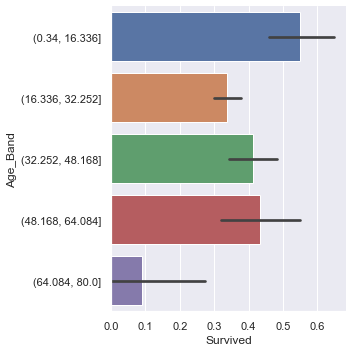

In [43]:
titanic['Age_Band']=pd.cut(titanic['Age'],5)
titanic['Age_Band'].unique()
sns.catplot(y="Age_Band",x='Survived',data=titanic,kind='bar')

In [44]:
#Here we can see that lowwer age passengers are more likely to survive and higger age likely to not survive

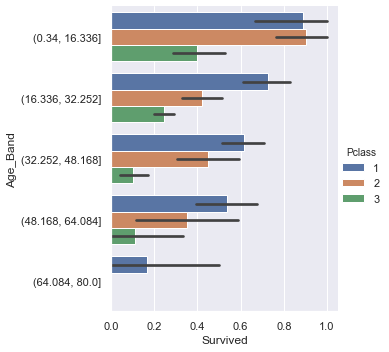

In [45]:
sns.catplot(y="Age_Band",x='Survived',data=titanic,kind='bar',hue='Pclass')

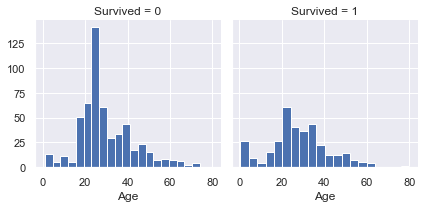

In [46]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [47]:
#here we can see that how the survival changes with the age

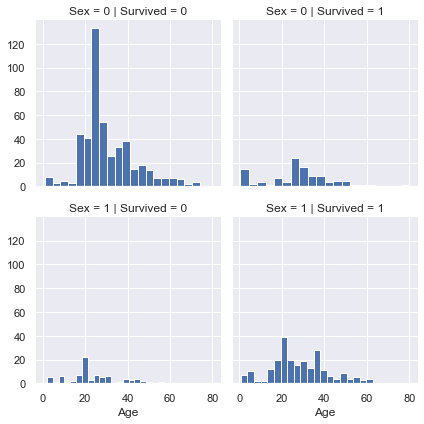

In [48]:
g = sns.FacetGrid(titanic, col='Survived',row='Sex')
g.map(plt.hist, 'Age', bins=20)

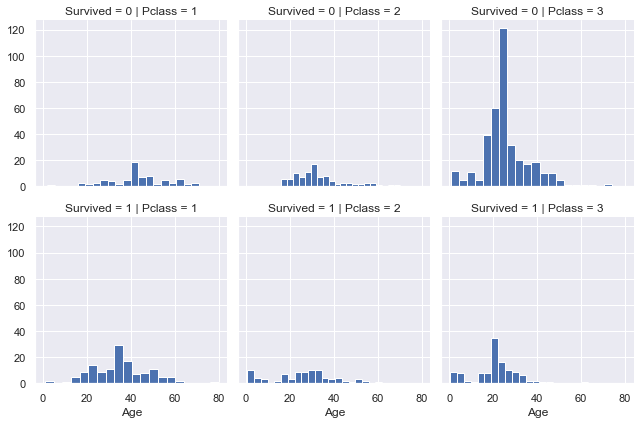

In [49]:
g = sns.FacetGrid(titanic, row='Survived',col='Pclass')
g.map(plt.hist, 'Age', bins=20)

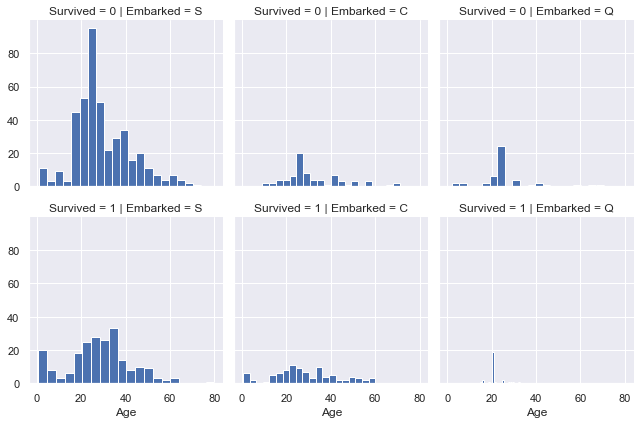

In [50]:
g = sns.FacetGrid(titanic, row='Survived',col='Embarked')
g.map(plt.hist, 'Age', bins=20)

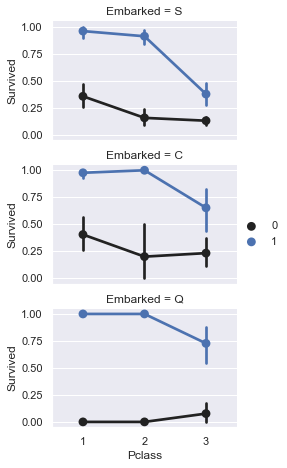

In [51]:
grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In [52]:
titanic=titanic.drop(['Age_Band'],1)

In [53]:
titanic.loc[(titanic['Age']<=16.136),'Age']=1
titanic.loc[(titanic['Age']>16.136) & (titanic['Age']<=32.102),'Age']=2
titanic.loc[(titanic['Age']>32.102) & (titanic['Age']<=48.068),'Age']=3
titanic.loc[(titanic['Age']>48.068) & (titanic['Age']<=64.034),'Age']=4
titanic.loc[(titanic['Age']>64.034) & (titanic['Age']<=80.),'Age']=5
titanic['Age'].unique()

array([2., 3., 4., 1., 5.])

# STEP 5 FEATURE ENGINEERING  ALONG DATA VISUALIZATION

# SibSp/Parch

Sibsb:Number of Sibling
    
Parch:Number of Parents

using this features we can create new fature Family

In [54]:
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']+1
titanic=titanic.drop(['SibSp','Parch'],1)

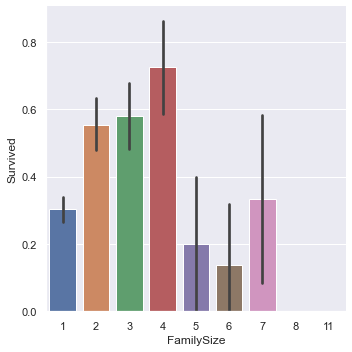

In [55]:
sns.catplot(x='FamilySize',y='Survived',data=titanic,kind='bar')

In [56]:
#Survival probility as per familysize

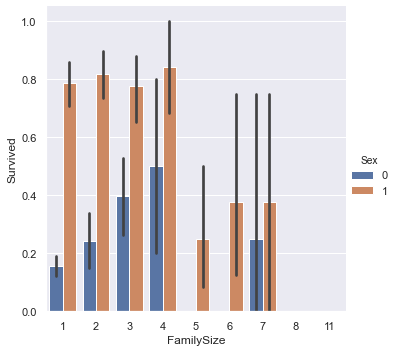

In [57]:
sns.catplot(x='FamilySize',y='Survived',data=titanic,kind='bar',hue='Sex')

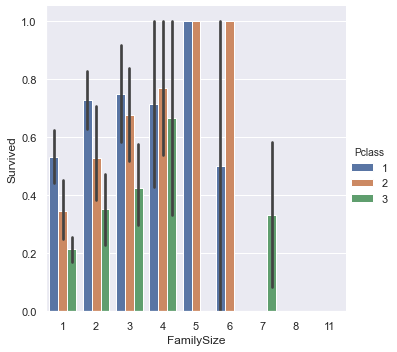

In [58]:
sns.catplot(x='FamilySize',y='Survived',data=titanic,kind='bar',hue='Pclass')

# FEATURE SELECTION

# Ticket

In [59]:
#Ticket is also like Passengerid which does not matter to Survivel of Passengers

In [60]:
titanic=titanic.drop(['Ticket'],1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,2.00,1.00,NaN,S,Mr,2
1,1,1,1,3.00,1.00,C85,C,Mrs,2
2,1,3,1,2.00,1.00,NaN,S,Miss,1
3,1,1,1,3.00,1.00,C123,S,Mrs,2
4,0,3,0,3.00,1.00,NaN,S,Mr,1


# Cabin

In [61]:
#This feature is to hard to find is it usefull for use or not? So, Let's do some oprations and find the meaningfull data

In [62]:
titanic['Cabin'].isnull().sum()

687

In [63]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [64]:
#there are lots of unique values are here so, Let's take first character of Cabin

In [65]:
#here we can see that lots of data are missing so lets fill "U"

In [66]:
titanic['Cabin']=titanic['Cabin'].fillna('U')
titanic['Cabin']=titanic['Cabin'].astype(str).str[0]

In [67]:
#there are lots of unique values are here so, Let's take first character of Cabin
titanic.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

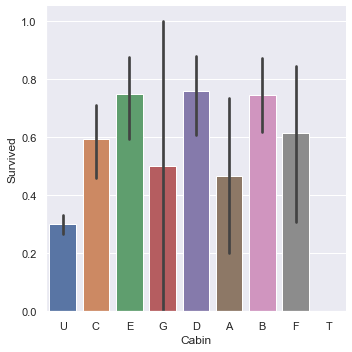

In [68]:
sns.catplot(x='Cabin',y='Survived',data=titanic,kind='bar')

In [69]:
#Now it seems like meaningfull data

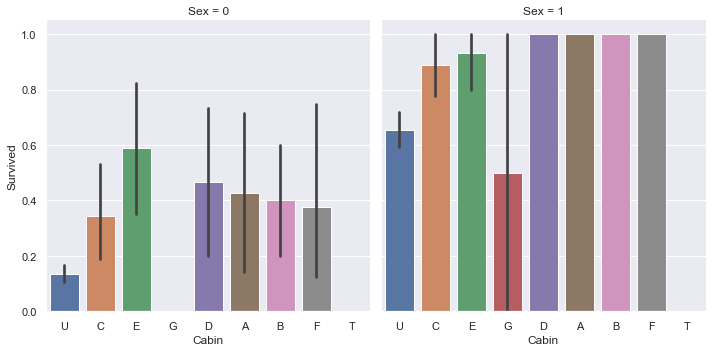

In [70]:
sns.catplot(x='Cabin',y='Survived',data=titanic,col='Sex',kind='bar')

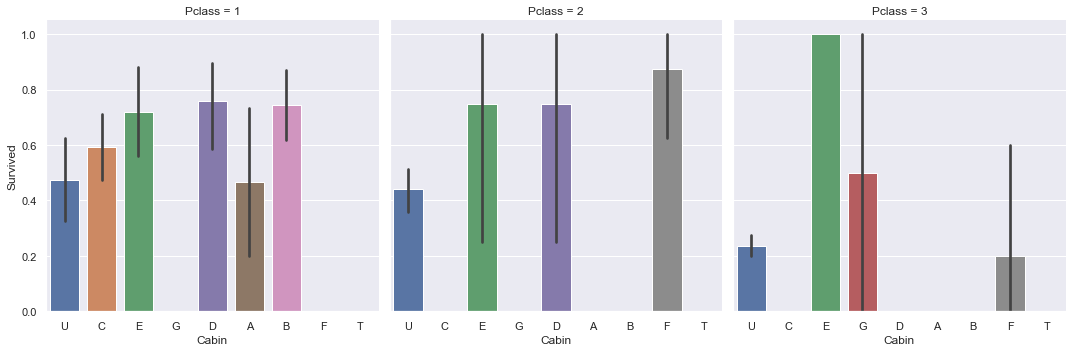

In [71]:
sns.catplot(x='Cabin',y='Survived',data=titanic,col='Pclass',kind='bar')

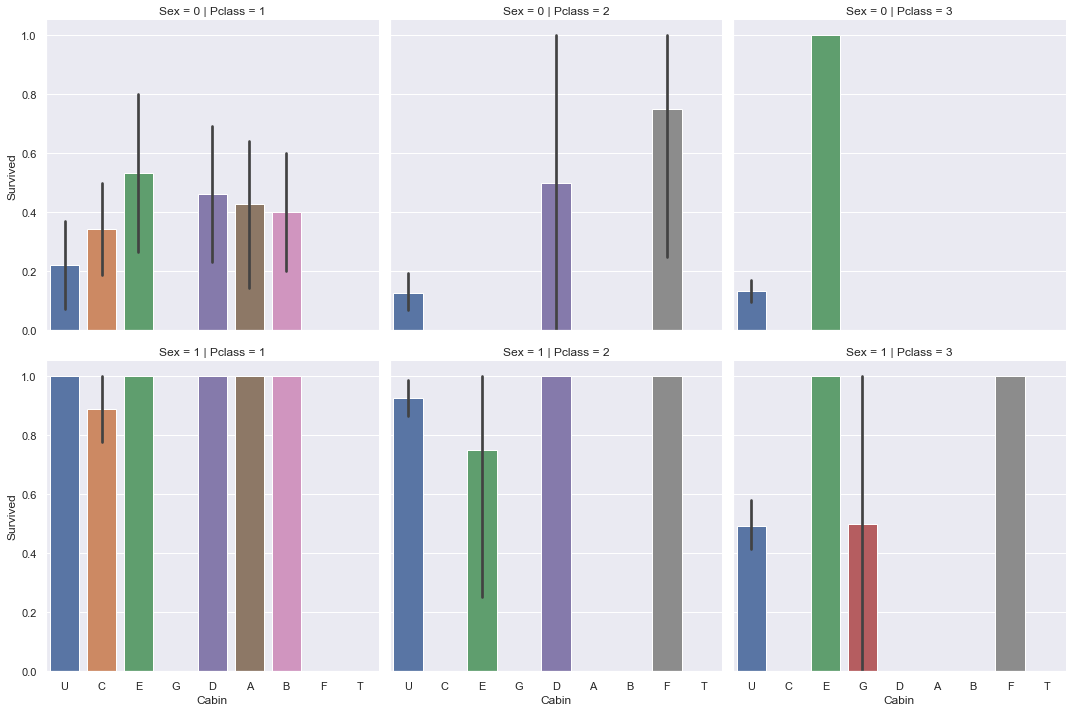

In [72]:
sns.catplot(x='Cabin',y='Survived',data=titanic,col='Pclass',row='Sex',kind='bar')

In [73]:
#There are many null values in cabin column but these have unique number which might belong to important people or 
#specially allocated cabins How ever it might be so many null values dont contribute much for the model building so
#dropping would be a vital solution


In [74]:
titanic=titanic.drop(['Cabin'],1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.00,1.00,S,Mr,2
1,1,1,1,3.00,1.00,C,Mrs,2
2,1,3,1,2.00,1.00,S,Miss,1
3,1,1,1,3.00,1.00,S,Mrs,2
4,0,3,0,3.00,1.00,S,Mr,1


# Embarked

In [75]:
print(titanic['Embarked'].unique())
print(titanic['Embarked'].isnull().sum())

['S' 'C' 'Q' nan]
2


In [76]:
#there are 2 missing values here, so let's replace it with most frequent value

In [77]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])
print(titanic['Embarked'].unique())

['S' 'C' 'Q']


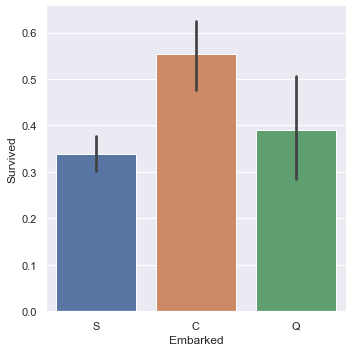

In [78]:
sns.catplot(x='Embarked',y='Survived',data=titanic,kind='bar')

In [79]:
#we allready seen plot which contain relation with other features so no need to see here
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.00,1.00,S,Mr,2
1,1,1,1,3.00,1.00,C,Mrs,2
2,1,3,1,2.00,1.00,S,Miss,1
3,1,1,1,3.00,1.00,S,Mrs,2
4,0,3,0,3.00,1.00,S,Mr,1


In [80]:
#Great, We have done all the Features

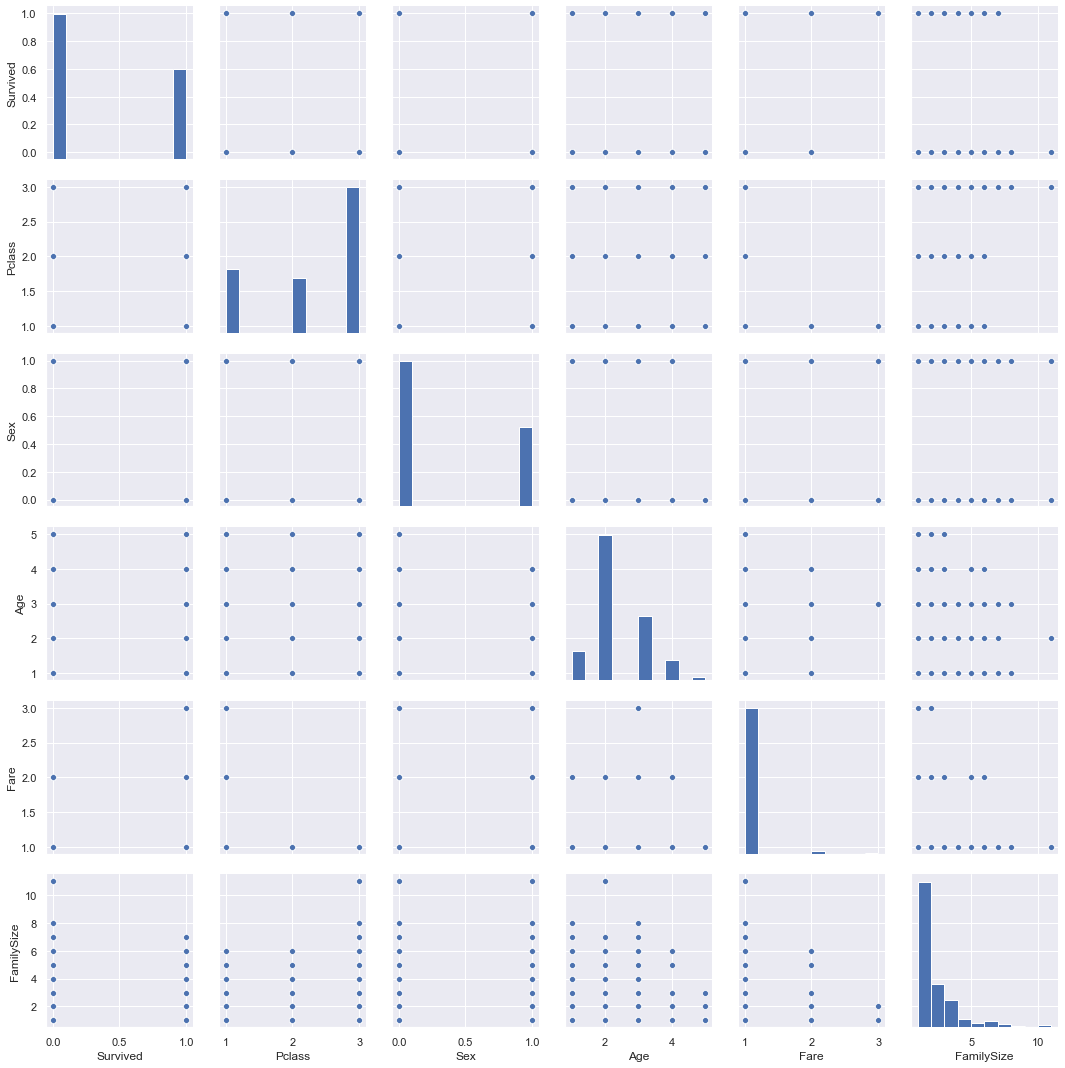

In [81]:
#pairplot plot a pairwise relationships in a dataset
sns.pairplot(titanic)

# STATISTICAL ANALYSIS ON NUMERICAL COLUMNS

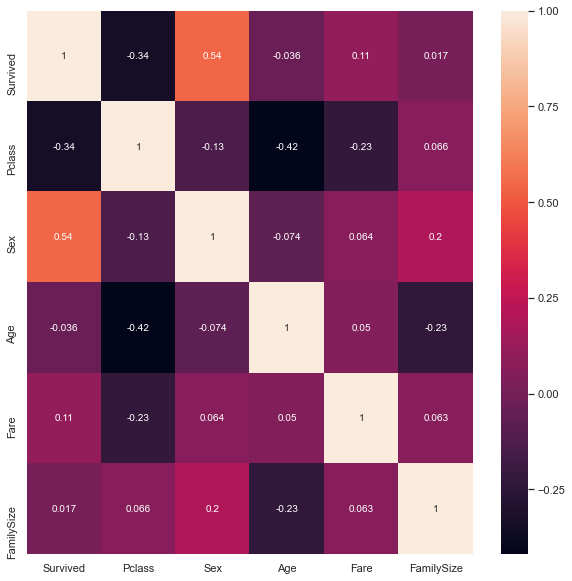

In [82]:
# understanding the correlation between variable by plotting correlation plot.
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True)


In [83]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.00,1.00,S,Mr,2
1,1,1,1,3.00,1.00,C,Mrs,2
2,1,3,1,2.00,1.00,S,Miss,1
3,1,1,1,3.00,1.00,S,Mrs,2
4,0,3,0,3.00,1.00,S,Mr,1


# LABEL ENCODING

In [84]:
titanic=pd.get_dummies(columns=['Pclass','Sex','Embarked','Title','Age','Fare'],data=titanic)
titanic.head()

,Survived,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,...,Title_Rev,Title_Sir,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Fare_1.0,Fare_2.0,Fare_3.0
0,0,2,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,2,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,1,2,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


# STEP 6 FEATURE SCALING  STANDARDIZATION OF DATA

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20,random_state =123)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_train

array([[ 0.07728104,  1.81360322, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       ...,
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853]])

In [88]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.70255492, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284,  1.81360322, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       ...,
       [ 0.70255492, -0.55138852,  1.94384246, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852,  1.94384246, ...,  0.16104844,
        -0.1466997 , -0.06504853]])

# STEP 7 MODEL BUILDING

In [89]:
from sklearn.model_selection import train_test_split
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20,random_state =123)

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01)
LR.fit(X_train,y_train)
print('Logistic Regression Train Score :',LR.score(X_train,y_train))
print('Logistic Regression Test Score :',LR.score(X_test,y_test))

Logistic Regression Train Score : 0.797752808988764
Logistic Regression Test Score : 0.8324022346368715


In [90]:
y_predict_LR=LR.predict(X_test)
print('Y Predict: ',y_predict_LR)

Y Predict:  [1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]


[[103  11]
 [ 19  46]]


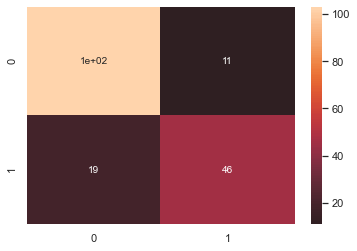

In [91]:
from sklearn.metrics import confusion_matrix
CM_LR=confusion_matrix(y_test,y_predict_LR)
print(CM_LR)
sns.heatmap(CM_LR,center=True,annot=True)

In [92]:
from sklearn.metrics import accuracy_score
acc_LR=accuracy_score(y_test,y_predict_LR)
print(acc_LR)

0.8324022346368715


In [93]:
from sklearn.metrics import classification_report
CR_LR=classification_report(y_test,y_predict_LR)
print(CR_LR)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       114
           1       0.81      0.71      0.75        65

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



LR_tpr:  [0.         0.09649123 1.        ]
LR_fpr:  [0.         0.70769231 1.        ]
threshold:  [2 1 0]


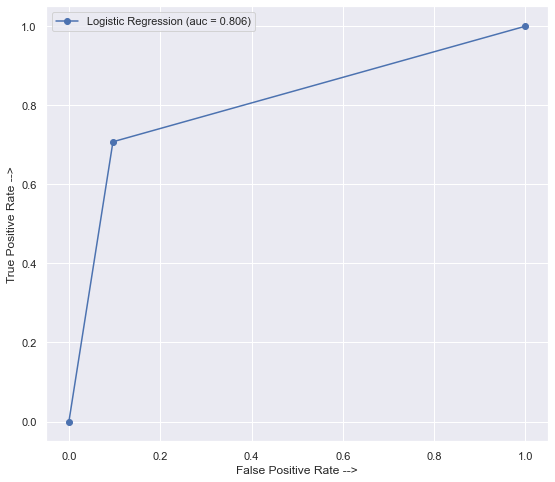

In [94]:
from sklearn.metrics import roc_curve,auc
LR_tpr,LR_fpr,threshold=roc_curve(y_test,y_predict_LR)
LR_auc = auc(LR_tpr, LR_fpr)
print('LR_tpr: ',LR_tpr)
print('LR_fpr: ',LR_fpr)
print('threshold: ',threshold)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 8))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()

In [95]:
from sklearn.svm import SVC
SVM=SVC(C=1,kernel='rbf')
SVM.fit(X_train,y_train)
print('Logistic Regression Train Score :',SVM.score(X_train,y_train))
print('Logistic Regression Test Score :',SVM.score(X_test,y_test))

Logistic Regression Train Score : 0.824438202247191
Logistic Regression Test Score : 0.8491620111731844


In [96]:
y_predict_SVM=SVM.predict(X_test)
print(y_predict_SVM)

[1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0]


[[102  12]
 [ 15  50]]


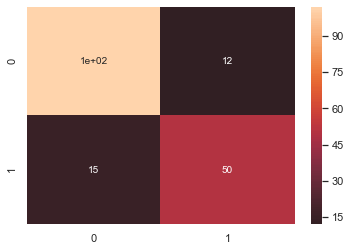

In [97]:
from sklearn.metrics import  confusion_matrix
CM_SVM=confusion_matrix(y_test,y_predict_SVM)
print(CM_SVM)
sns.heatmap(CM_SVM,center=True,annot=True)

In [98]:
from sklearn.metrics import accuracy_score
acc_svm=accuracy_score(y_test,y_predict_SVM)
print(acc_svm)

0.8491620111731844


In [99]:
from sklearn.metrics import classification_report
CR_SVM=classification_report(y_test,y_predict_SVM)
print(CR_SVM)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



svm_tpr [0.         0.10526316 1.        ]
svm_fpr [0.         0.76923077 1.        ]
threshold [2 1 0]


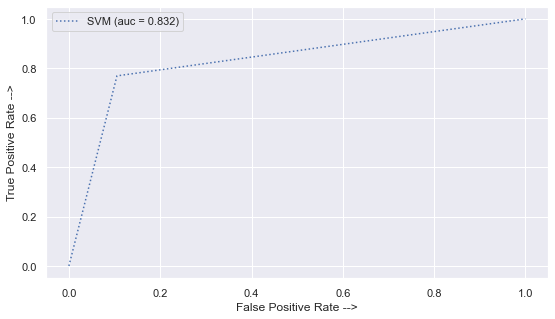

In [100]:
from sklearn.metrics import roc_curve,auc
svm_tpr,svm_fpr,threshold=roc_curve(y_test,y_predict_SVM)
svm_auc=auc(svm_tpr,svm_fpr)
print('svm_tpr',svm_tpr)
print('svm_fpr',svm_fpr)
print('threshold',threshold)


#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(svm_tpr, svm_fpr, linestyle=':', label='SVM (auc = %0.3f)' % svm_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13,metric = 'minkowski', p = 1)
knn.fit(X_train,y_train)
print('KNN Train Score :',knn.score(X_train,y_train))
print('KNN Test Score :',knn.score(X_test,y_test))

KNN Train Score : 0.8286516853932584
KNN Test Score : 0.8715083798882681


In [102]:
y_predict_knn=knn.predict(X_test)
print(y_predict_knn)

[0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[107   7]
 [ 16  49]]


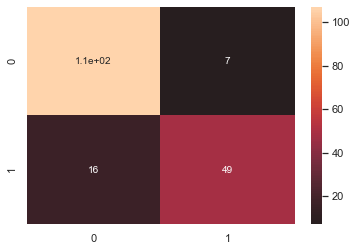

In [103]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,y_predict_knn)
print(cm_knn)
sns.heatmap(cm_knn,center=True,annot=True)

In [104]:
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_predict_knn)
print(acc_knn)

0.8715083798882681


In [105]:
from sklearn.metrics import classification_report
cr_knn=classification_report(y_test,y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       114
           1       0.88      0.75      0.81        65

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



True Positive Rate [0.         0.06140351 1.        ]
False Positive Rate [0.         0.75384615 1.        ]
threshold [2 1 0]


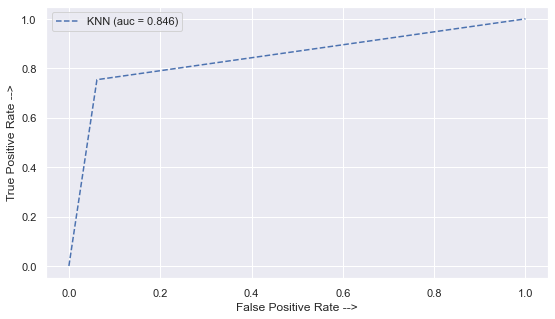

In [106]:
from sklearn.metrics import roc_curve,auc
knn_tpr,knn_fpr,threshold=roc_curve(y_test,y_predict_knn)
print('True Positive Rate',knn_tpr)
print('False Positive Rate',knn_fpr)
print('threshold',threshold)

knn_auc=auc(knn_tpr,knn_fpr)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(knn_tpr, knn_fpr, linestyle='--', label='KNN (auc = %0.3f)' %knn_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,y_train)
print(' DecisionTree Train Score :',dt.score(X_train,y_train))
print(' DecisionTree Test Score :',dt.score(X_test,y_test))
print('DecisionTree Classifier Model feature importances are :\n ' , dt.feature_importances_)

 DecisionTree Train Score : 0.851123595505618
 DecisionTree Test Score : 0.8324022346368715
DecisionTree Classifier Model feature importances are :
  [1.10589479e-01 4.30778185e-02 2.51704673e-03 1.24701056e-01
 1.66407892e-02 0.00000000e+00 2.25841532e-03 2.00523434e-04
 1.29990241e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.59504876e-03 2.00495063e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.10926427e-03 0.00000000e+00
 0.00000000e+00 5.47536150e-01 0.00000000e+00 0.00000000e+00
 3.56503437e-02 0.00000000e+00 3.13212009e-03 1.01693060e-02
 1.09783491e-02 1.82360883e-02 1.02643091e-02 7.52063895e-03
 9.77472401e-03 0.00000000e+00]


In [108]:
y_predict_dt=dt.predict(X_test)
print(y_predict_dt)

[0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


In [109]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test,y_predict_dt)
print(acc_dt)

0.8324022346368715


[[101  13]
 [ 17  48]]


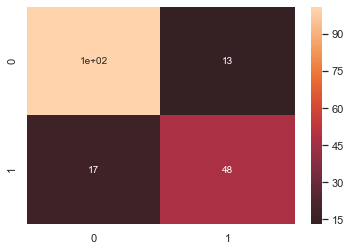

In [110]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_predict_dt)
print(cm_dt)
sns.heatmap(cm_dt,center=True,annot=True)

In [111]:
from sklearn.metrics import classification_report
cr_dt=classification_report(y_test,y_predict_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.79      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



True Positive Rate [0.         0.11403509 1.        ]
False Positive Rate [0.         0.73846154 1.        ]
threshold [2 1 0]


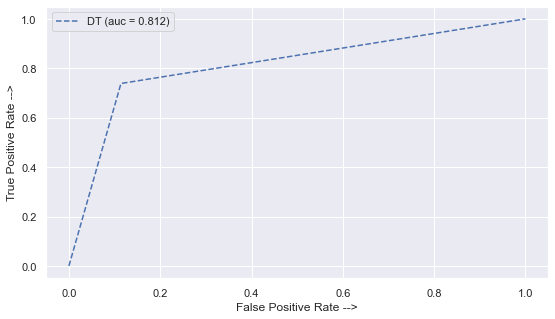

In [112]:
from sklearn.metrics import roc_curve,auc
dt_tpr,dt_fpr,threshold=roc_curve(y_test,y_predict_dt)
print('True Positive Rate',dt_tpr)
print('False Positive Rate',dt_fpr)
print('threshold',threshold)

dt_auc=auc(dt_tpr,dt_fpr)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(dt_tpr, dt_fpr, linestyle='--', label='DT (auc = %0.3f)' %dt_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(criterion = 'entropy',max_depth=6,n_estimators=9)
rf.fit(X_train,y_train)
print('Random Force Train Score :',rf.score(X_train,y_train))
print('Random Force Test Score :',rf.score(X_test,y_test))
print('Random Force Classifier Model feature importances are :\n ' , rf.feature_importances_)
print('----------------------------------------------------')

Random Force Train Score : 0.8356741573033708
Random Force Test Score : 0.8659217877094972
Random Force Classifier Model feature importances are :
  [1.08603262e-01 7.25404682e-02 1.77245437e-02 9.81420053e-02
 1.60637516e-01 1.09400936e-01 2.46315697e-02 7.43912682e-03
 2.28190146e-02 0.00000000e+00 6.04613580e-04 9.35194853e-04
 1.17753579e-03 5.06135767e-03 0.00000000e+00 0.00000000e+00
 1.62455991e-03 1.01493282e-02 3.68943655e-02 0.00000000e+00
 0.00000000e+00 2.11208540e-01 4.17000174e-02 1.22292866e-04
 4.18343737e-03 0.00000000e+00 1.42796590e-02 1.80105855e-02
 3.49306256e-03 9.06650021e-03 3.21016288e-03 1.04548887e-02
 3.71138415e-03 2.17407033e-03]
----------------------------------------------------


In [114]:
y_pred_rf=rf.predict(X_test)
print('Y Pred',y_pred_rf)

Y Pred [1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[105   9]
 [ 15  50]]


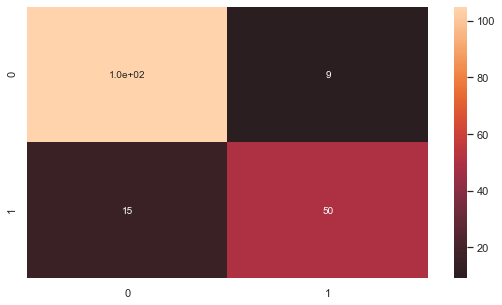

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [116]:
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',acc_rf)

Accuracy Score 0.8659217877094972


In [117]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       114
           1       0.85      0.77      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.87      0.86       179



rf_tpr Value  :  [0.         0.07894737 1.        ]
rf_fpr Value  :  [0.         0.76923077 1.        ]
thresholds Value  :  [2 1 0]


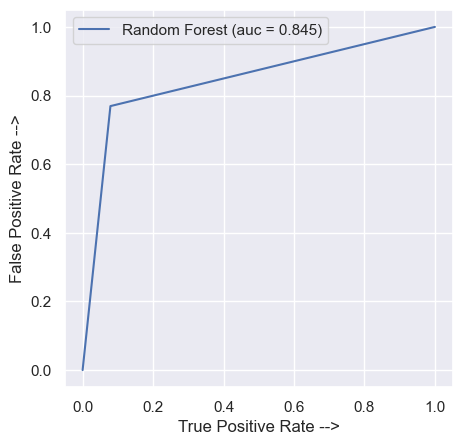

In [118]:
from sklearn.metrics import roc_curve,auc
rf_tpr,rf_fpr,threshold=roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Forest (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [119]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('XGB Train Score :',xgb.score(X_train,y_train))
print('XGB Test Score :',xgb.score(X_test,y_test))

XGB Train Score : 0.8623595505617978
XGB Test Score : 0.8268156424581006


In [120]:
y_pred_xgb=xgb.predict(X_test)
print('Y Pred',y_pred_xgb)

Y Pred [1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[101  13]
 [ 18  47]]


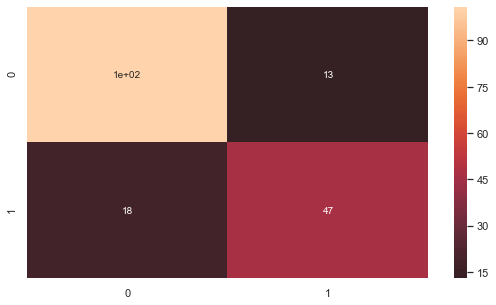

In [121]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_xgb)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [122]:
from sklearn.metrics import accuracy_score
acc_xgb=accuracy_score(y_test,y_pred_xgb)
print('Accuracy Score',acc_xgb)

Accuracy Score 0.8268156424581006


In [123]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.78      0.72      0.75        65

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.83      0.83       179



xgb_tpr Value  :  [0.         0.11403509 1.        ]
xgb_fpr Value  :  [0.         0.72307692 1.        ]
thresholds Value  :  [2 1 0]


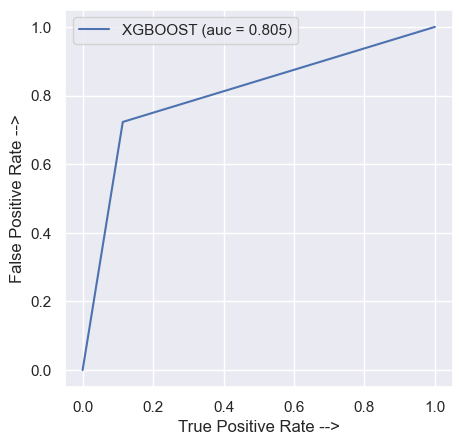

In [124]:
from sklearn.metrics import roc_curve,auc
xgb_tpr,xgb_fpr,threshold=roc_curve(y_test,y_pred_xgb)
xgb_auc=auc(xgb_tpr,xgb_fpr)
print('xgb_tpr Value  : ', xgb_tpr)
print('xgb_fpr Value  : ', xgb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xgb_tpr, xgb_fpr, linestyle='-', label='XGBOOST (auc = %0.3f)' % xgb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [125]:
from sklearn.naive_bayes import BernoulliNB
NB=BernoulliNB()
NB.fit(X_train,y_train)
print('Naive Bayse Train Score',NB.score(X_train,y_train))
print('Naive Bayse Test Score',NB.score(X_test,y_test))

Naive Bayse Train Score 0.7949438202247191
Naive Bayse Test Score 0.8156424581005587


In [126]:
#Calculating Prediction
y_pred_NB = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)
y_pred_prob2=y_pred_prob.astype(int)
print('Y Test' ,y_test)
print('Predicted Value for BernoulliNBModel is : ' , y_pred_NB)
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob2)


Y Test 172    1
524    0
452    0
170    0
620    0
      ..
388    0
338    1
827    1
773    0
221    0
Name: Survived, Length: 179, dtype: int64
Predicted Value for BernoulliNBModel is :  [1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0]
Prediction Probabilities Value for BernoulliNBModel is : 
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 

[[94 20]
 [13 52]]


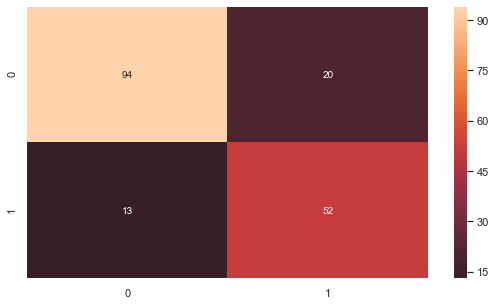

In [127]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_NB)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)

In [128]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(y_test,y_pred_NB)
print(acc_nb)

0.8156424581005587


In [129]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_NB)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       114
           1       0.72      0.80      0.76        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



nb_tpr Value  :  [0.        0.1754386 1.       ]
nb_fpr Value  :  [0.  0.8 1. ]
thresholds Value  :  [2 1 0]


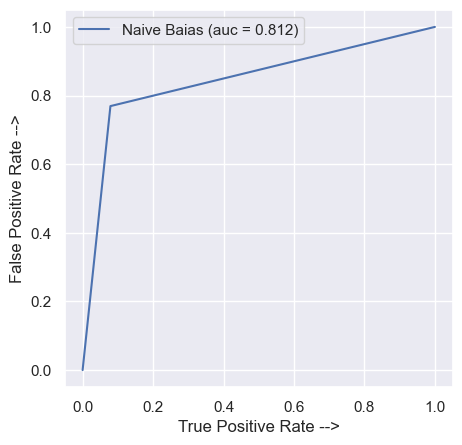

In [130]:
from sklearn.metrics import roc_curve,auc
nb_tpr,nb_fpr,threshold=roc_curve(y_test,y_pred_NB)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Naive Baias (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

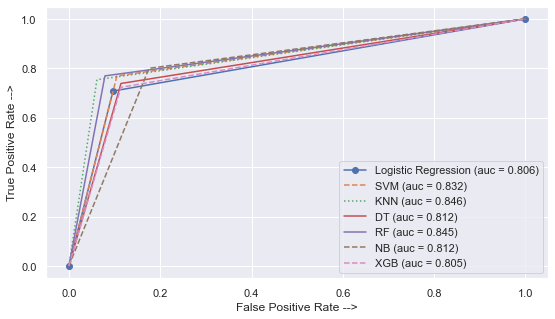

In [131]:
from sklearn.metrics import roc_curve, auc

LR_tpr,LR_fpr,threshold=roc_curve(y_test,y_predict_LR)
LR_auc = auc(LR_tpr, LR_fpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_predict_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_predict_knn)
auc_knn = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_predict_dt)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)


nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_NB)
auc_nb = auc(nb_fpr, nb_tpr)

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(9, 5))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='NB (auc = %0.3f)' % auc_nb)
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGB (auc = %0.3f)' % auc_xgb)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

# STEP 8 OPTIMIZATION USING GRID SEARCH CV

In [132]:
#Here KNN ,SVM, RF  are almost the same for optimization  so lets choose best model among them and
#apply optimization to all

In [133]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834643 using {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}
0.764684 (0.042405) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.764684 (0.042405) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.783389 (0.036599) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.793116 (0.040075) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.799102 (0.044943) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.790123 (0.049942) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.812570 (0.041632) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.811074 (0.047075) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.811448 (0.043969) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.802469 (0.048274) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.816311 

In [134]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.823045 (0.042308) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.826412 (0.039506) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.705200 (0.043139) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.828657 (0.036381) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.833146 (0.036783) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.707819 (0.044728) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.831650 (0.040047) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.833895 (0.038071) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.734755 (0.049177) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.824168 (0.034728) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.817434 (0.033902) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.758324 (0.040182) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.618780 (0.009613) with: {'C': 0.01, 'gamma': 'scale',

In [135]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.812944 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.801721 (0.042500) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.808455 (0.037422) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.812944 (0.040461) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.800224 (0.042503) with: {'max_features': 'log2', 'n_estimators': 10}
0.808455 (0.042482) with: {'max_features': 'log2', 'n_estimators': 100}
0.812196 (0.039185) with: {'max_features': 'log2', 'n_estimators': 1000}


In [136]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830902 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830153 (0.035673) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830902 (0.035413) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.829779 (0.035242) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830153 (0.035556) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830527 (0.035176) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830527 (0.036095) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.828283 (0.036856) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.828283 (0.036856) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.828657 (0.035478) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.825290 (0.033197) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.825290 (0.033197) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823419 (0.034136) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.806210 (0.037806) with: {

# STEP 9 CONCLUSION:

# KNN IS THE BEST MODEL FOR TITANIC DATASET.